<span style='color:gray'> Author: Glicerio Vergara.</span>

*https://www.linkedin.com/in/glicerio-vergara*
___
# <span style='color:DarkBlue'> Prediction using Unsupervised ML.</span>  
___

This is my proposed solution for the Second task of the Graduate Rotational Internship Program from The Sparks Foundation (March 2021).

The excersise requieres to predict the optimum number of clusters and represent it visually From the given ‘Iris’ dataset.
The solution uses K-Means Clustering in order to stablis the cluster and uses "the elbow" method to optimum number of clusters.

Further instruction information can be found on the following link: *https://drive.google.com/file/d/1cBAUXcE_asXCHNHmZXgVUIZztDi648s1/view?usp=sharing*

### <span style='color:DarkBlue'>  Import the libraries and Data </span>  

In [1]:
# Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load data
df = sns.load_dataset("iris")

# display full Dataframe without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 0)

### <span style='color:DarkBlue'>  Familiarize with the data frame </span>  

In [2]:
# Display the first data points
df.head ()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Display basic stadistic information by species 
df.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa      50.0         5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor  50.0         5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica   50.0         6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width                                                \
                 count   mean       std  min    25%  50%    75%  max   
species                                                                
setosa      50.0        3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor  50.0        2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica   50.0        2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max   
species                                                                
setosa      50.0         1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor  50.0         4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica   50.0         5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal_width                                            
                 count   mean       std  min  25%  50%  75%  max  
species                                                           
setosa      50.0        0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  50.0        1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   50.0        2.026  0.274650  1.4  1.8  2.0  2.3  2.5

### <span style='color:DarkBlue'>  Visualing the data </span>  

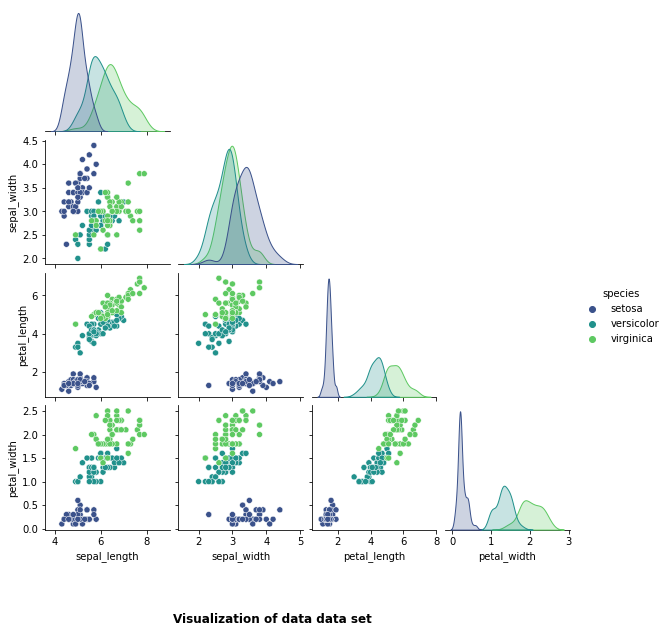

In [4]:
# Display the different combination of variable pluss their distribution by species  
sns.pairplot(df, hue="species",height=2,corner=True, palette="viridis")
plt.text(-8,-2, "Visualization of data data set",fontsize=12,weight="bold")
plt.show()

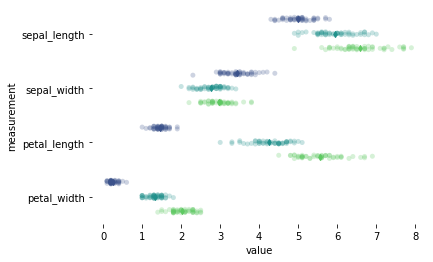

In [5]:
# Display the distribution of the variable by species  

# Structuring the data in long format to support the visualization
iris = pd.melt(df, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1,palette="viridis")

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="viridis",
              markers="d", scale=.60, ci=None)

ax.get_legend().remove()
plt.show()

<ipython-input-6-8c07e9113f8e>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.fig.show()


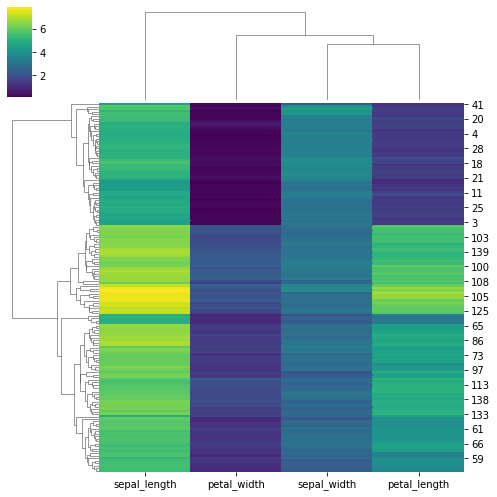

In [6]:
species = df.pop("species")
g = sns.clustermap(df,cmap="viridis", figsize=(7,7),)
g.fig.show()

In [7]:
plotly = px.data.iris()

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = plotly['species_id'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list([
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'Sepal Length', values = plotly['sepal_length']),
            dict(range = [0,8],
                label = 'Sepal Width', values = plotly['sepal_width']),
            dict(range = [0,8],
                label = 'Petal Length', values = plotly['petal_length']),
            dict(range = [0,8],
                label = 'Petal Width', values = plotly['petal_width']),
            dict(range = [0,8],
                label = 'Species', values = plotly['species_id'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

### <span style='color:DarkBlue'>  Finding optimum number of clusters for k-means classification </span>  

In [8]:
# Structuring the data
x = df.iloc[:, [0, 1, 2, 3]].values

# Loading the k-mean library
from sklearn.cluster import KMeans

# Creating list to insert the result from the K-mean loop
wcss = []

# K-mean loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### <span style='color:DarkBlue'>  Visualising the K-means Clustering number by the elbow method </span>  

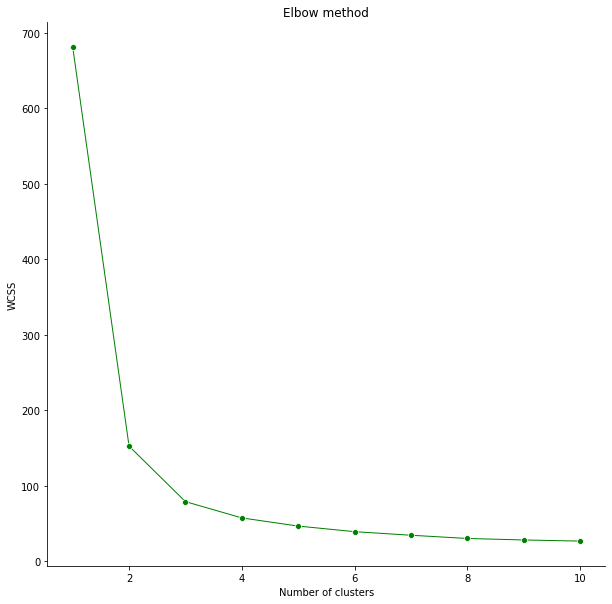

The optimal number of cluster is 3


In [9]:
wcss = pd.DataFrame(wcss,columns =['wcss'])
wcss['Number of clusters']=range(1, 11)

plt.figure(figsize=(10, 10))
sns.lineplot(data=wcss, x="Number of clusters", y="wcss", color = 'green', linewidth=1,marker='o')
sns.despine()

plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print ("The optimal number of cluster is 3")

### <span style='color:DarkBlue'>   Accuracy of the K-means Cluster </span>  

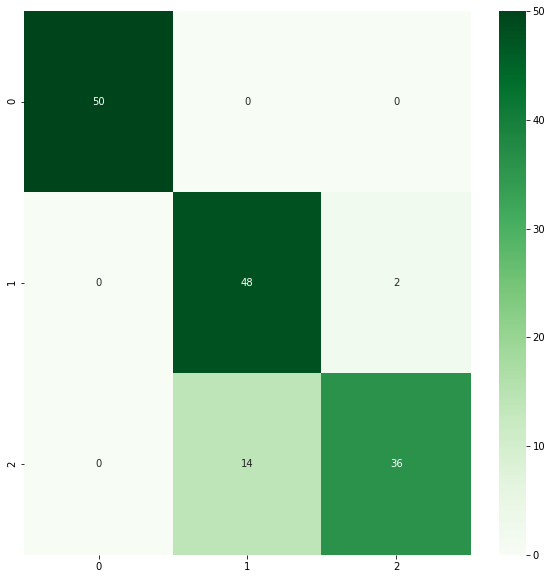

The accurary of the K-mean is : 0.8933333333333333
/Users/JustGlory/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [10]:
# Concatenate the K-mean with the data set

Y_kmeans = pd.DataFrame(y_kmeans,columns =['K-mean 3n result'])
Y_kmeans = Y_kmeans.replace({ 1:'setosa',  2:'versicolor', 0:'virginica'})
df=pd.concat([plotly, Y_kmeans],axis=1)

# Display Matrix with results of the comparizon between K-mean and actual classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['species'], df['K-mean 3n result'])
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.show()

from sklearn.metrics.classification import accuracy_score

Ac2 = accuracy_score(df['K-mean 3n result'],df['species'])
print ("The accurary of the K-mean is :",Ac2)

### <span style='color:DarkBlue'> Visualization Clusters by PCA  </span>  

In [11]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
df1=df.iloc[:,0:4]
pca.fit(df1)

components = pca.fit_transform(df1)
components = pd.DataFrame(components,columns =['PC 1', 'PC 2', 'PC 3', 'PC 4'])

PCAexplvari=np.cumsum(pca.explained_variance_ratio_)
PCAexplvari = pd.DataFrame(PCAexplvari, columns =['Cexplvari'])
PCAexplvari['Number of PC']=['PC 1','PC 2','PC 3','PC 4']

explvari=pca.explained_variance_ratio_
explvari = pd.DataFrame(explvari, columns =['Cexplvari'])
explvari['Number of PC']=['PC 1','PC 2','PC 3','PC 4']


### <span style='color:DarkBlue'> 2D PCA Visualization </span>  

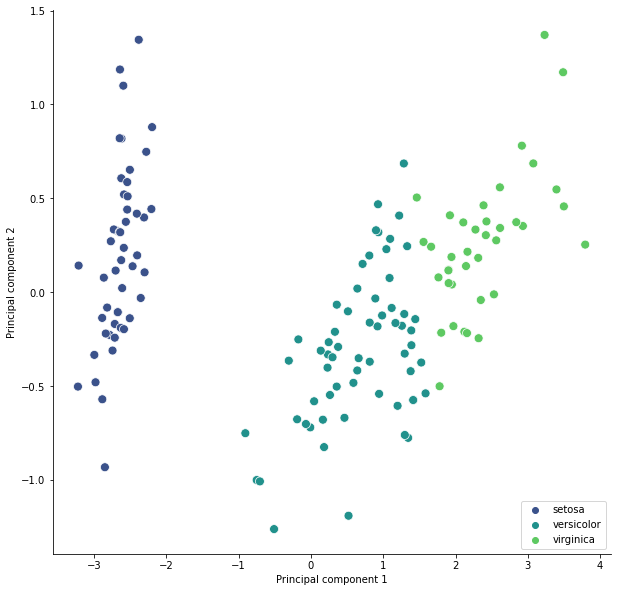

Total explain variance 99.48169145498102 %


In [12]:
final=pd.concat([df, components],axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=final, x="PC 1", y="PC 2", hue="K-mean 3n result",palette="viridis",s=80)
sns.despine()
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(loc="lower right")
plt.show()
print ("Total explain variance",PCAexplvari.iloc[2,0]*100,"%")

### <span style='color:DarkBlue'> 3D PCA Visualization </span>  

In [13]:
total_var=PCAexplvari.iloc[2,0]
fig = px.scatter_3d(
    final, x="PC 2", y="PC 1", z="PC 3", color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    color_continuous_scale=["red", "green", "blue"],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### <span style='color:DarkBlue'> PCA explained variance ratio </span>  

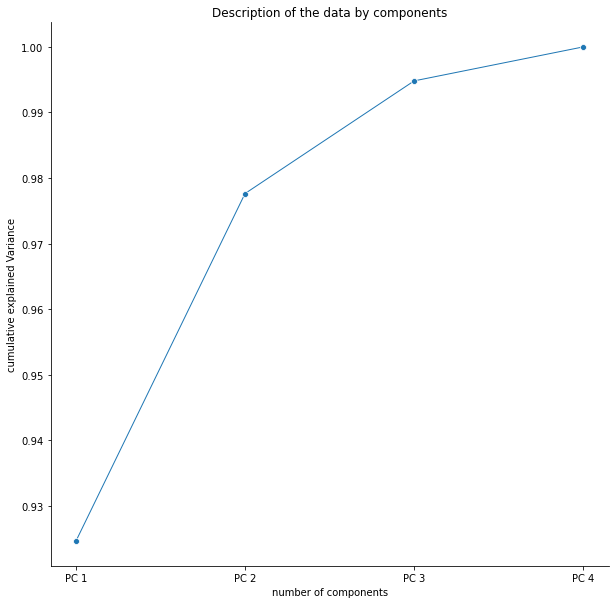

Principal component 1 is responsible for 92.46162071742684 % variance
Principal component 2 is responsible for 5.3015567850535 % variance
Principal component 3 is responsible for 1.7185139525006794 % variance
Principal component 4 is responsible for 0.5183085450189927 % variance


In [14]:
# Displaying the PCA variance graph
plt.figure(figsize=(10, 10))
sns.lineplot(data=PCAexplvari, x="Number of PC", y="Cexplvari",  linewidth=1,marker='o')
sns.despine()
plt.title('Description of the data by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained Variance')
plt.show()

# Displaying the PCA variance resu
print ("Principal component 1 is responsible for",explvari.iloc[0,0] *100,"% variance")
print ("Principal component 2 is responsible for",explvari.iloc[1,0] *100,"% variance")
print ("Principal component 3 is responsible for",explvari.iloc[2,0] *100,"% variance")
print ("Principal component 4 is responsible for",explvari.iloc[3,0] *100,"% variance")